In [1]:
import sys, os
sys.path.insert(0, os.path.abspath("../pyCudaPolygon"))
import pyCudaPolygon as pcp
import numpy as np
from matplotlib import pyplot as plt
from pyCudaPolygonLink import libpyCudaPolygon as lpcp


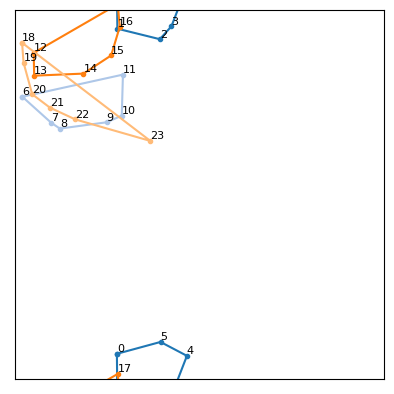

In [2]:
numPolygons = 4
n = 6
m = pcp.model(size = n * numPolygons, seed = 7)
m.setModelEnum("normal")
# Set all polygons to be equally coordinated
m.setECPolygons(n)
# Set random polygon vertices positions
m.setRandomPolygons()
# Make it so that all of the polygons have the same area
m.setMonoArea(phi = 0.1)
m.draw(numbering = True)
plt.show()

In [3]:
# Works fine
m.setMaxEdgeLength()
# use default max edge length by finding it within the simulation
# You can adjust this later.
m.initializeNeighborCells()
m.updateNeighborCells()
m.updateNeighbors(0.05)

In [4]:
intersections, newTU, starts, ends = m.getIntersections()

In [5]:
def unpack(val):
    """Unpack a 64-bit integer back into four 16-bit numbers."""
    nums = np.zeros(4)
    nums[3] = val & 0xFFFF
    nums[2] = (val >> 16) & 0xFFFF
    nums[1] = (val >> 32) & 0xFFFF
    nums[0] = (val >> 48) & 0xFFFF
    return nums  

In [6]:
ij = []
sij = []
for i in range(len(intersections)):
    sisjji = unpack(intersections[i])
    ij.append(sisjji[2:][::-1])
    sij.append(sisjji[0:2])
ij = np.array(ij, dtype = int)
sij = np.array(sij, dtype = int)

In [7]:
ij,sij

(array([[ 0, 17],
        [ 8, 22],
        [11, 23],
        [15,  1],
        [17, 23],
        [23,  9],
        [20, 11],
        [23, 13]]),
 array([[0, 2],
        [1, 3],
        [1, 3],
        [2, 0],
        [2, 3],
        [3, 1],
        [3, 1],
        [3, 2]]))

In [8]:
intersections, _, _, _ = m.getIntersections()
players = m.getPlayers()

In [9]:
for index in range(players.size):
    firstIntersection = intersections[index]
    secondIntersection = intersections[players[index]]
    j = (firstIntersection >> 16) & 0xFFFF
    i = (firstIntersection) & 0xFFFF
    l = (secondIntersection >> 16) & 0xFFFF
    k = (secondIntersection) & 0xFFFF
    print(i, j, k, l)
    

0 17 15 1
8 22 23 9
11 23 20 11
15 1 0 17
17 23 23 13
23 9 11 23
20 11 8 22
23 13 17 23


In [10]:
# That seems right...I think!
# Next we write the functional. Is there a way to get the behavior we want by repeatedly
# calling a void function that acts as an input?

# Call the function which will affect the relevant arrays (probably need to overload 
# and use enums)

In [11]:
m.updateOverlapArea(10000)

In [12]:
m.getOverlapAreaPY(), m.getOverlapArea()

(0.015553913703247883, array(0.01555386))

In [13]:
# There seems to be some bug. It may be in my new python function, 
# but it may also be in the implementation of my area calculator. 
# I think it's the latter since it appears to agree when there aren't 
# segments where multiple overlaps occur. Perhaps I got that math wrong?